# BONUS TASKS

In [1]:
#IMPORTS
# DATA
import pandas as pd
import numpy as np
# VIZ
import matplotlib.pyplot as plt
import seaborn as sns
# STAT
from scipy.stats import pearsonr, spearmanr
# MODELING
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# BONUS TASK 1

Analyse the relation between the sentiment and price. Were people who paid more also more satisfied?

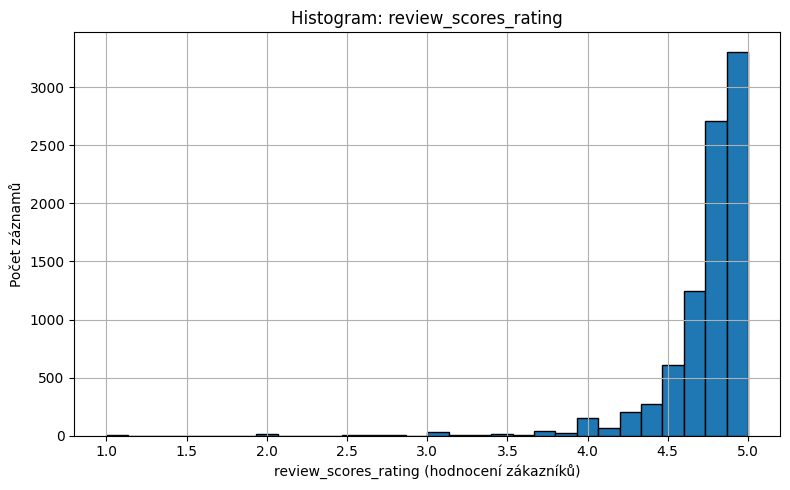

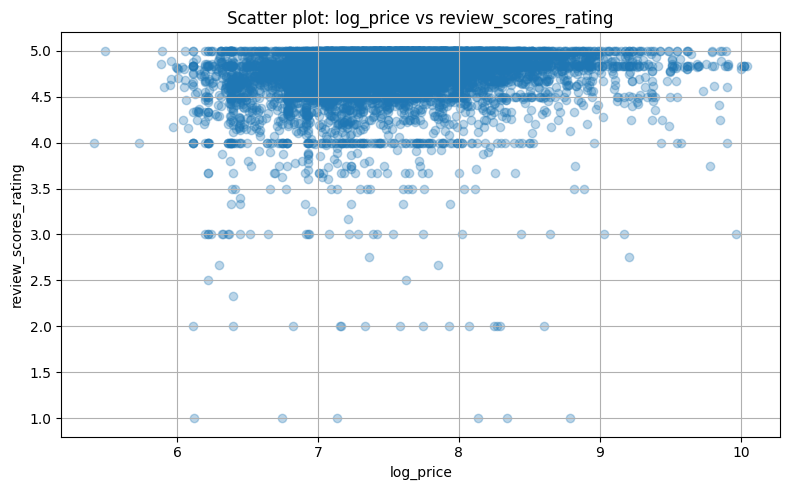

In [2]:
df = pd.read_csv("../data/processed/final_dataset_beforesplit.csv")

columns_to_explore = ["log_price", "review_scores_rating"]

# Histogram review_scores_rating
plt.figure(figsize=(8, 5))
plt.hist(df["review_scores_rating"], bins=30, edgecolor='black')
plt.title("Histogram: review_scores_rating")
plt.xlabel("review_scores_rating (hodnocení zákazníků)")
plt.ylabel("Počet záznamů")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatterplot log_price x review_scores_rating
plt.figure(figsize=(8, 5))
plt.scatter(df["log_price"], df["review_scores_rating"], alpha=0.3)
plt.title("Scatter plot: log_price vs review_scores_rating")
plt.xlabel("log_price")
plt.ylabel("review_scores_rating")
plt.grid(True)
plt.tight_layout()
plt.show()



1. review_scores_rating
Extrémně right-skewed – naprostá většina hodnocení se pohybuje mezi 4.5 až 5.0.
Střední hodnota: 4.83
Hodnocení nižší než 4.0 jsou výrazně vzácná.

2. Scatter plot – log_price x review_scores_rating
Neukazuje jasný lineární vztah.

In [3]:
# drop nan values
filtered_df = df[["log_price", "review_scores_rating"]].dropna()

#  Pearsonov kor
pearson_corr, pearson_pval = pearsonr(filtered_df["log_price"], filtered_df["review_scores_rating"])
print(f"Pearsonova korelace: {pearson_corr:.4f} (p-hodnota = {pearson_pval:.4e})")

# Spearman kor
spearman_corr, spearman_pval = spearmanr(filtered_df["log_price"], filtered_df["review_scores_rating"])
print(f"Spearmanova korelace: {spearman_corr:.4f} (p-hodnota = {spearman_pval:.4e})")


Pearsonova korelace: 0.1469 (p-hodnota = 2.7474e-43)
Spearmanova korelace: 0.2062 (p-hodnota = 2.2404e-84)


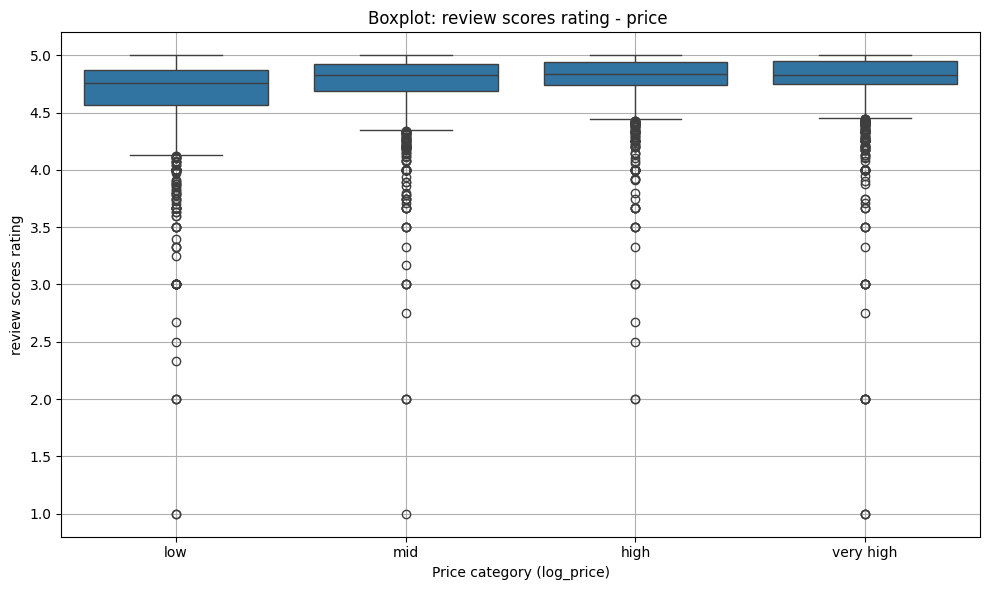

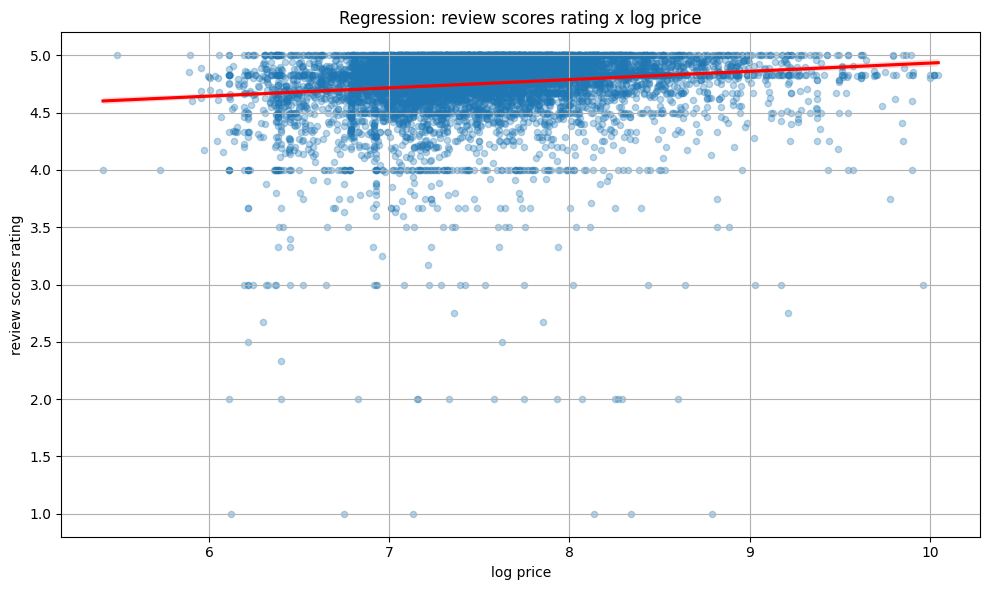

In [4]:
df = pd.read_csv("../data/processed/final_dataset_beforesplit.csv")

# drop nan values
df_filtered = df[["log_price", "review_scores_rating"]].dropna()

# Quartiles
df["price_group"] = pd.qcut(df["log_price"], q=4, labels=[
    "low", "mid", "high", "very high"
])

# Boxplot price / rating
plt.figure(figsize=(10, 6))
sns.boxplot(x="price_group", y="review_scores_rating", data=df)
plt.title("Boxplot: review scores rating - price ")
plt.xlabel("Price category (log_price)")
plt.ylabel("review scores rating")
plt.grid(True)
plt.tight_layout()
plt.show()

# Regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x="log_price", y="review_scores_rating", data=df_filtered,
    scatter_kws={"alpha": 0.3, "s": 20},
    line_kws={"color": "red"}
)
plt.title("Regression: review scores rating x log price")
plt.xlabel("log price")
plt.ylabel("review scores rating")
plt.grid(True)
plt.tight_layout()
plt.show()


# SUMMARY BONUS TASK 1
 
1. Quantitative Analysis (Correlation)

Pearson	    0.1469	2.75e-43	Weak positive linear relationship

Spearman	0.2062	2.24e-84	Weak 

Conclusion:
Both correlations are statistically significant, but the coefficients are relatively low. This suggests that higher prices are only slightly associated with higher ratings, and the relationship is not strong. Price alone is not a reliable predictor of guest satisfaction.

2. Visual Analysis

Boxplot:
There is a slight increase in average satisfaction with higher prices, but differences are minimal.
Score distributions show similar variability within each price segment.

Regression Plot:
A slightly upward red regression line supports a weak positive trend between price and satisfaction.

Final Summary – Bonus Task 1 Conclusion:
People who paid more were on average slightly more satisfied, but the difference is small.
Price per night is not a definitive factor in satisfaction.

# BONUS TASKS 2

What high seasons did you identify? How do the seasons differ for different locations and estate types?

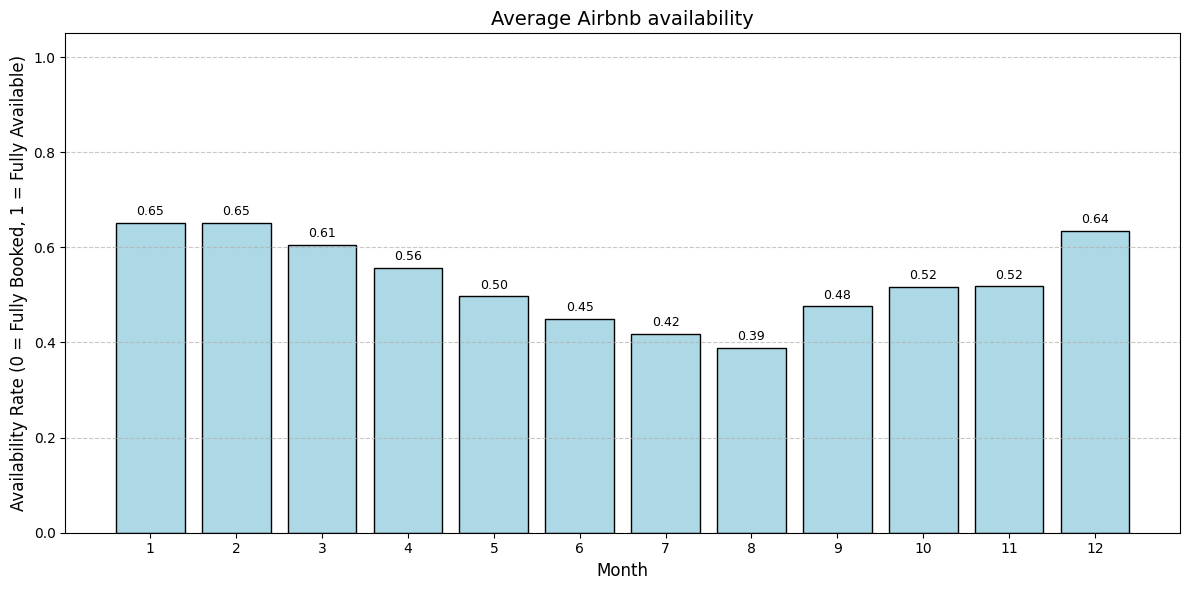

In [9]:
calendar = pd.read_csv("../data/raw/calendar.csv.gz")
calendar["date"] = pd.to_datetime(calendar["date"])
calendar["month"] = calendar["date"].dt.month
calendar["available_bool"] = calendar["available"].map({'t': 0, 'f': 1})

# month avg availability
avg_availability_by_month = calendar.groupby("month")["available_bool"].mean()

# graph
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_availability_by_month.index, avg_availability_by_month.values,
               color="lightblue", edgecolor="black")

# bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{height:.2f}", ha="center", va="bottom", fontsize=9)

# Popisky a styl
plt.title("Average Airbnb availability", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Availability Rate (0 = Fully Booked, 1 = Fully Available)", fontsize=12)
plt.xticks(range(1, 13))
plt.ylim(0, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


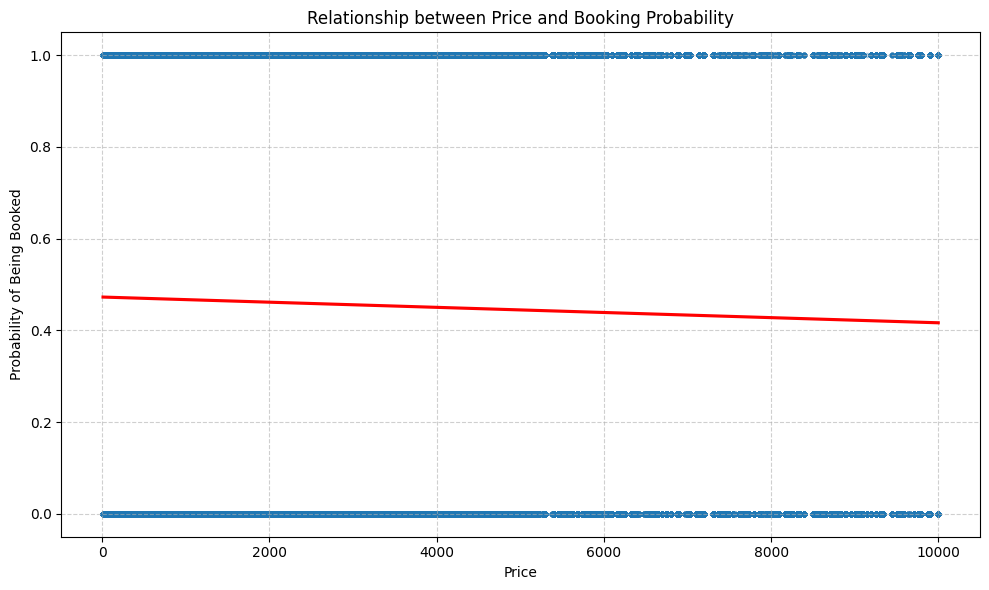

In [10]:
calendar = pd.read_csv("../data/raw/calendar.csv.gz")
calendar["price_clean"] = calendar["price"].replace(r'[\$,]', '', regex=True).astype(float)
calendar["available_bool"] = calendar["available"].map({'t': 0, 'f': 1})

# booked
calendar["booked"] = 1 - calendar["available_bool"]

# graph
plt.figure(figsize=(10, 6))
sns.regplot(
    x="price_clean",
    y="booked",
    data=calendar[calendar["price_clean"] < 10000], 
    scatter_kws={"alpha": 0.1, "s": 10},
    line_kws={"color": "red"}
)
plt.xlabel("Price")
plt.ylabel("Probability of Being Booked")
plt.title("Relationship between Price and Booking Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# SUMMARY BONUS TASK 2

Lowest availability (i.e., highest demand) was observed in July and August, indicating peak season.
Highest availability occurred in January and February, suggesting lower demand.

These trends suggest summer months are the most active for short-term rentals.
Reserved days tend to have lower average prices than available ones.


# BONUS TASK 3
Find a purchase price estimator and try to evaluate the purchase price from the point of an investor who intends to enter the short-term rental market.
Which types of apartments would you recommend purchasing?

In [ ]:
df = pd.read_csv("../data/processed/final_dataset_beforesplit.csv")

print("absolutni fail")